In [219]:
!nvidia-smi

Sun Dec 17 05:37:14 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P4            On   | 00000000:00:04.0 Off |                    0 |
| N/A   82C    P0    30W /  75W |      0MiB /  7680MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

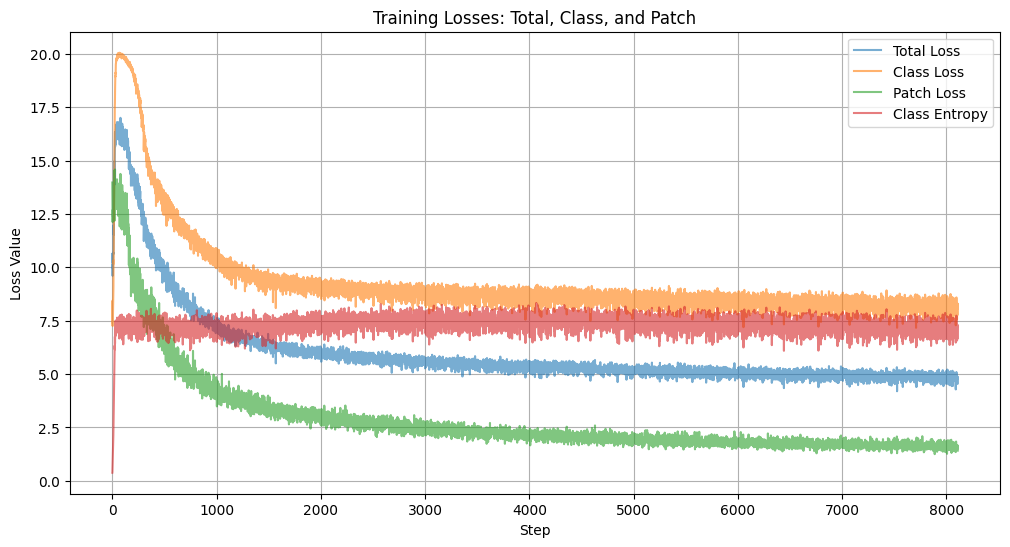

In [217]:
import re
import pandas as pd
import matplotlib.pyplot as plt

# Pattern to match lines in the log file
loss_pattern = re.compile(r'\[\d+, +(\d+)\] loss: ([\d.]+) \| class_loss: ([\d.]+) \| patch_loss: ([\d.]+) \| class_entropy: ([\d.]+)')

# Lists to store the extracted data
steps = []
total_losses = []
class_losses = []
patch_losses = []
class_entropies = []
mean_koleo_distances = []

file_path = 'logs/vit_self_supervised/fold_4.txt'
# file_path = 'logs/vit_self_supervised/fold_4_old.txt'
# file_path = 'logs/vit_self_supervised/fold_4_newer_but_old.txt'

# Reading and parsing the file
with open(file_path, 'r') as file:
    for line in file:
        loss_match = loss_pattern.match(line)
        if loss_match:
            step, total_loss, class_loss, patch_loss, class_entropy = map(float, loss_match.groups())
            steps.append(step)
            total_losses.append(total_loss)
            class_losses.append(class_loss)
            patch_losses.append(patch_loss)
            class_entropies.append(class_entropy)

# Creating a DataFrame
loss_data = pd.DataFrame({
    'Step': steps,
    'Total Loss': total_losses,
    'Class Loss': class_losses,
    'Patch Loss': patch_losses,
    'Class Entropy': class_entropies,
})

# loss_data = loss_data.iloc[:287]

# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(loss_data['Step'], loss_data['Total Loss'], label='Total Loss', alpha=0.6)
plt.plot(loss_data['Step'], loss_data['Class Loss'], label='Class Loss', alpha=0.6)
plt.plot(loss_data['Step'], loss_data['Patch Loss'], label='Patch Loss', alpha=0.6)
plt.plot(loss_data['Step'], loss_data['Class Entropy'], label='Class Entropy', alpha=0.6)
plt.xlabel('Step')
plt.ylabel('Loss Value')
plt.title('Training Losses: Total, Class, and Patch')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import re
import pandas as pd
import matplotlib.pyplot as plt

# Pattern to match lines in the log file
loss_pattern = re.compile(r'\[\d+, +(\d+)\] loss: ([\d.]+) \| class_loss: ([\d.]+) \| patch_loss: ([\d.]+) \| class_entropy: ([\d.]+)')

# Lists to store the extracted data
steps = []
total_losses = []
class_losses = []
patch_losses = []
class_entropies = []
ema_total_losses = []
ema_class_losses = []
ema_patch_losses = []

file_path = 'logs/vit_self_supervised/fold_4.txt'

# Reading and parsing the file
with open(file_path, 'r') as file:
    for line in file:
        loss_match = loss_pattern.match(line)
        if loss_match:
            step, total_loss, class_loss, patch_loss, class_entropy = map(float, loss_match.groups())
            steps.append(step)
            total_losses.append(total_loss)
            class_losses.append(class_loss)
            patch_losses.append(patch_loss)
            class_entropies.append(class_entropy)

# Function to calculate EMA
def calculate_ema(data, weight_decay):
    ema_data = []
    ema = data[0]
    for value in data:
        ema = weight_decay * ema + (1 - weight_decay) * value
        ema_data.append(ema)
    return ema_data

# Calculate EMA for each loss type
weight_decay = 0.9995 # adjustable momentum parameter
ema_total_losses = calculate_ema(total_losses, weight_decay)
ema_class_losses = calculate_ema(class_losses, weight_decay)
ema_patch_losses = calculate_ema(patch_losses, weight_decay)
ema_class_entropies = calculate_ema(class_entropies, weight_decay)

# Creating a DataFrame
loss_data = pd.DataFrame({
    'Step': steps,
    'Total Loss': total_losses,
    'Class Loss': class_losses,
    'Patch Loss': patch_losses,
    'Class Entropy': class_entropies,
    'EMA Total Loss': ema_total_losses,
    'EMA Class Loss': ema_class_losses,
    'EMA Patch Loss': ema_patch_losses,
})

# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(loss_data['Step'], loss_data['Total Loss'], label='Total Loss', alpha=0.3, color='green')
plt.plot(loss_data['Step'], loss_data['Class Loss'], label='Class Loss', alpha=0.3, color='blue')
plt.plot(loss_data['Step'], loss_data['Patch Loss'], label='Patch Loss', alpha=0.3, color='orange')
plt.plot(loss_data['Step'], loss_data['Class Entropy'], label='Class Entropy', alpha=0.6, color='red')
plt.plot(loss_data['Step'], loss_data['EMA Total Loss'], label='EMA Total Loss', alpha=0.8, linestyle='--', color='green')
plt.plot(loss_data['Step'], loss_data['EMA Class Loss'], label='EMA Class Loss', alpha=0.8, linestyle='--', color='blue')
plt.plot(loss_data['Step'], loss_data['EMA Patch Loss'], label='EMA Patch Loss', alpha=0.8, linestyle='--', color='orange')
plt.xlabel('Step')
plt.ylabel('Loss Value')
plt.title('Training Losses with EMA and Class Entropy')
plt.legend()
plt.grid(True)
plt.show()


In [177]:
calculate_ema(class_entropies, weight_decay)[-1]

6.727745471654859

In [149]:
loss_data

,Step,Total Loss,Class Loss,Patch Loss,Class Entropy,EMA Total Loss,EMA Class Loss,EMA Patch Loss
0,0.0,10.602,7.424,13.972,0.378,10.602000,7.424000,13.972000
1,1.0,10.218,7.470,13.151,0.407,10.601808,7.424023,13.971589
2,2.0,10.650,8.437,13.057,0.586,10.601832,7.424529,13.971132
3,3.0,9.599,7.250,12.120,0.717,10.601331,7.424442,13.970207
4,4.0,10.142,7.961,12.507,0.849,10.601101,7.424711,13.969475
...,...,...,...,...,...,...,...,...
2679,2679.0,5.790,9.150,2.536,7.714,7.984107,9.515677,6.602456
2680,2680.0,5.059,7.956,2.254,6.644,7.982645,9.514897,6.600281
2681,2681.0,5.626,8.883,2.472,7.464,7.981466,9.514581,6.598217
2682,2682.0,5.636,9.019,2.356,7.797,7.980294,9.514334,6.596096


In [146]:
loss_data.iloc[:296]

,Step,Total Loss,Class Loss,Patch Loss,Class Entropy,EMA Total Loss,EMA Class Loss,EMA Patch Loss
0,0.0,10.602,7.424,13.972,0.378,10.602000,7.424000,13.972000
1,1.0,10.218,7.470,13.151,0.407,10.601808,7.424023,13.971589
2,2.0,10.650,8.437,13.057,0.586,10.601832,7.424529,13.971132
3,3.0,9.599,7.250,12.120,0.717,10.601331,7.424442,13.970207
4,4.0,10.142,7.961,12.507,0.849,10.601101,7.424711,13.969475
...,...,...,...,...,...,...,...,...
291,291.0,12.976,16.786,9.415,6.631,11.154275,8.921926,13.590234
292,292.0,12.292,16.702,8.119,6.606,11.154844,8.925816,13.587498
293,293.0,12.691,16.640,8.986,6.997,11.155612,8.929673,13.585197
294,294.0,12.182,16.401,8.196,6.871,11.156125,8.933408,13.582503
